<img align="left" width="150" height="150" src="https://upload.wikimedia.org/wikipedia/commons/4/42/CNAM_Logo.svg">

<h1 align="center">Master 2 Stratégies économiques, numérique et données (SEND)</h1>
<h2 align="center">EAR 212</h2>
<h3 align="center">Identifier les leaders d’opinion de la souveraineté numérique sur Twitter</h3>
<h4 align="center">Aurélien Diop Lascroux</h4>
<h5 align="center">Avril 2023</h5>

<u>1. Introduction</u>

En France, la plateforme Twitter comptabilise ~ 16M de visiteurs mensuels et fait partie des sites les plus consultés en France (1).<br>
Twitter est un réseau social où chacun et libre de donner son avis et de partager son opinion sur tous les sujets d’actualité, c'est la plateforme d’information par excellence: l'ubiquité d'une information omniprésente disponible et partageable en temps réel par tous et partout.<br>
Twitter est un espace numérique particulièrement adapté au débat public, désormais la majorité de la communication politique s’effectue via ce média social (2).
Certaines tendances ou bien certains sujets de nature politique peuvent être analysés pertinement notamment via la collecte et l’analyse des données sur Twitter.<br>
A l’ère du numérique, les questions autour de la souveraineté numérique, enjeu stratégique pour la croissance économique et de vie privé pour le citoyen, s'est imposée dans la société française et paradoxalement comme un terme récurrent du débat public sur Twitter.<br>
Le champ de l'étude quantitative porte sur l'identification des leaders français de ce débat sur la plateforme et de déterminer sous-jacentement leur appartenance à des groupes identifiables (cf. sphère public ou privé) via une analyse des graphes (basée sur la théorie des réseaux).<br>
La méthodologie de l'étude quantitative fondée sur les données de Twitter est expliquée ci-dessous pas à pas.

<u>2. Méthodologie</u>

<u>2.1 Collecte des données</u>

Le téléchargement des Tweets s'est opéré via l’API Twitter V2 en accès Elevated (version gratuite) permettant d'accéder aux tweets > 7 jours, l'API est appelée via la bibliothèque (package) 'Tweepy' (cf. voir en annexe les bibliothèques installés).<br>
Le champ de l'étude se porte sur le terme de recherche: "souveraineté numérique", tous les tweets contenant les mots clés relatifs à ce terme ont été extraits, outre le corps des tweets, d'autres métadonnées ont été extraites (ID d'utilisateur, nom d'utilisateur, date de publication, le fait qu'il s'agisse ou non d'un retweet, hashtags, mentions d'autres utilisateurs).<br>
Les données des tweets publiés du 14/03/2023 au 20/04/2023 contenant ce terme ont été extraits (limite de récupération fixée à 2 000 tweets par requête) et sauvegardées hebdomadairement dans un fichier <code>.CSV</code>.<br>


&rarr; Import des bibliothèques: tweepy, datetime et csv

In [ ]:
import tweepy
import datetime
import csv

&rarr;	Initialisation et authentification

In [ ]:
consumer_key=''
consumer_secret=''
access_token=''
access_token_secret=''

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret) 
auth.secure = True
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

&rarr; Création et écriture du fichier <code>.CSV</code>

In [ ]:
dataset_T = datetime.datetime.now().strftime('data/dataset_T_%m-%d-%Y.csv')
with open(dataset_T, 'w', newline='', encoding="utf-8") as csvfile:
    headers = ['user_id', 'user_name', 't_user','retweet_count', 
                'favorite_count', 'created_at','retweeted','hashtags', 'user_mentions','text']
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(headers)

&rarr; Collecte des données relatives aux tweets (via la méthode "search_tweets") extraites à l'aide de l'attribut _json pour chaque objet tweet et stockées dans une liste.

In [ ]:
query = "souveraineténumérique OR souverainetenumerique OR souverainete_numerique OR #souverainetenumerique OR souverainete-numerique"
 for page in tweepy.Cursor(api.search_tweets, count=2000, q=query, tweet_mode= 'extended').pages():
        rows = []
        for tweet in page:
            retweet = hasattr(tweet, 'retweeted_status')
            rows.append([tweet._json['user']['id'],
                         tweet._json['user']['screen_name'],
                         tweet._json['user']['name'],
                         tweet._json['retweet_count'],
                         tweet._json['favorite_count'],
                         tweet._json['created_at'],
                         retweet,
                         tweet._json['entities']['hashtags'],
                         tweet._json['entities']['user_mentions'],
                         tweet._json['full_text']])
        writer.writerows(rows)

<u>2.2 Structuration des données</u>

Une fois les données hebdomadaires des tweets collectées et sauvegardées dans un fichier <code>.CSV</code>, l'appel de la bibliothèque Pandas permettra l'importation de ces données dans un objet DataFrame afin de faciliter la manipulation des données à analyser.<br>
Ensuite le DataFrame doit etre nettoyé, en filtrant les tweets retweetés, pour ne finalement ne garder que les utilisateurs retweetant engagés: c'est à dire, ceux citant le tweet d'un autre utilisateur en tapant « RT » au début d'un tweet pour indiquer qu'ils republient le contenu.<br>
Ces données sont ensuite structurées et sauvegardées dans un nouveau DataFrame comprenant les metadatas suivantes:
<ul><li>Nom d'utilisateur du tweet.</li>
<li>Nom d'utilisateur du retweet.</li>
<li>Nombre de retweet.</li>
<li>Nombre de favoris.</li>
<li>Date de création du tweet.</li>
<li>Statut du tweet : retweet ou non.</li>
<li>Hastag.</li>
<li>Mentions d'utilisateur.</li></ul>
Une problématique rencontrée est le nommage des colonnes des DataFrames, lors de la segmentation des tweets et des retweets, les DataFrames sont créés en utilisant deux colonnes "t_user" et "rt_user", sauf que le nom des colonnes ne correspond pas aux valeurs contenues, car dans le DataFrame initial (dataset_T), la colonne "t_user" correspond, par défaut, à l'utilisateur ayant retweeté, donc pour gagner en cohérence le nommage de ces colonnes la fonction "rename" est utilisée.<br>
Une fois les données structurées, les DataFrames hebdomadaires sont sauvegardés dans un fichier <code>.CSV</code>.<br>
Depuis le 14/03/2023, 6 DataFrames "tweets" et 6 DataFrames "retweets" ont été générés:<br>

&gt; Résultat (avant nettoyage) : 3 094 tweets & 2 345 retweets (76% des tweets)<br>

L'étape suivante consiste à agréger les données collectées en concatenant les 6 DataFrames hebdomadaires "retweets" dans une liste et sauvegarder ces données consolidées dans un fichier <code>.CSV</code>, la fonction <code>glob()</code> (importée via la bibliothèque glob) facilite la recherche des fichiers dans un répertoire spécifique.<br>

A partir du DataFrame agréageant l'exhaustivité des retweets collectées sur la période données, on peut effectuer une analyse de donnée textuelle du corps des tweets en visualisant les termes les plus récurrents via la bibliothèque 'wordcloud' (générateur de nuage de mots clés), et ainsi repérer les anomalies dans le champ lexical et nettoyer le Dataset de manière optimale:
<ul><li>Une opération de tokenisation permet de découper le texte en morceaux (appelées tokens).</li>
<li>L'import de la bibliothèque NLTK (Natural Language ToolKit) télécharger les stopwords en français cela permet de retirer les mots qui n’apportent pas de sens et servent seulement à faire le lien entre deux prépositions.</li></ul>

&gt; Résultat : 584 retweets contenant des termes relatifs à la transition énergétique ont été détectés et supprimées (manuellement), le dataset final comptabilise 1 772 observations.

&rarr; Import des bibliothèques: pandas et glob

In [ ]:
import pandas as pd
import glob

&rarr; Lecture et visualisation des données de tweet du fichier <code>.CSV</code> via la fonction <code>read_csv()</code> dans un DataFrame (ci-dessous: affichage non exhaustif des tweets collectées en S16 2023)

In [ ]:
tweets_df = pd.read_csv(dataset_T, sep=";")

&rarr; Lecture et visualisation du DataFrame agrégeant les tweets retweetés (ci-dessous: affichage non exhaustif des tweets collectées en S16 2023)

In [1]:
tweets_df = pd.read_csv('dataset_T', sep=";")
tweets_df_rt = tweets_df[tweets_df['retweeted'] == False]
retweets_df = tweets_df[tweets_df['retweeted'] == True]
reseau_df_rt = retweets_df[retweets_df['text'].str.contains("RT @")]
reseau_df_final = (reseau_df_rt.assign(rt_user = reseau_df_rt['text'].str.split('@').str[1].str.split(':').str[0])[['t_user','rt_user','user_id','retweet_count','favorite_count','created_at','retweeted','hashtags', 'user_mentions','text']])
reseau_df_final.head()

,t_user,rt_user,user_id,retweet_count,favorite_count,created_at,retweeted,hashtags,user_mentions,text
0,lamarsweb,lamarsweb,1432372695128215560,613,0,Fri Apr 21 18:14:07 +0000 2023,True,"[{'text': 'Tricastin', 'indices': [15, 25]}]","[{'screen_name': 'lamarsweb', 'name': 'La Mars...",RT @lamarsweb: #Tricastin : L'arrivée d'Agnès ...
1,lamarsweb,lamarsweb,460181979,613,0,Fri Apr 21 18:13:09 +0000 2023,True,"[{'text': 'Tricastin', 'indices': [15, 25]}]","[{'screen_name': 'lamarsweb', 'name': 'La Mars...",RT @lamarsweb: #Tricastin : L'arrivée d'Agnès ...
2,lamarsweb,lamarsweb,1105461503849828352,613,0,Fri Apr 21 18:12:01 +0000 2023,True,"[{'text': 'Tricastin', 'indices': [15, 25]}]","[{'screen_name': 'lamarsweb', 'name': 'La Mars...",RT @lamarsweb: #Tricastin : L'arrivée d'Agnès ...
3,lamarsweb,lamarsweb,1016017610062876672,613,0,Fri Apr 21 18:10:01 +0000 2023,True,"[{'text': 'Tricastin', 'indices': [15, 25]}]","[{'screen_name': 'lamarsweb', 'name': 'La Mars...",RT @lamarsweb: #Tricastin : L'arrivée d'Agnès ...
4,lamarsweb,lamarsweb,2774476016,613,0,Fri Apr 21 18:08:29 +0000 2023,True,"[{'text': 'Tricastin', 'indices': [15, 25]}]","[{'screen_name': 'lamarsweb', 'name': 'La Mars...",RT @lamarsweb: #Tricastin : L'arrivée d'Agnès ...


&rarr; Ecriture (via la fonction <code>to_csv()</code>) et lecture du DataFrame dans un fichier <code>.CSV</code>

In [ ]:
dataset_RT = datetime.datetime.now().strftime('data/dataset_RT_%m-%d-%Y.csv')
reseau_df_final.to_csv(dataset_RT,sep=";")
reseau_df_final = pd.read_csv(dataset_RT,sep=";")

&rarr; Chargement des DataFrames hebdomadaires des tweets retweetés dans une liste et consolidation des données dans un fichier <code>.CSV</code> via la fonction <code>concat()</code>

In [ ]:
df_list = []
for filename in glob.glob('data/dataset_RT*.csv'):
    df_list.append(pd.read_csv(filename, sep=";"))
concat_df = pd.concat(df_list, ignore_index=True)
concat_df.to_csv('data/dataset_RT_final.csv', sep=";", index=False)
reseau_df_concat = pd.read_csv('data/dataset_RT_final.csv',sep=";")

&rarr; Analyse de données textuelles du DataFrame avec les données consolidées des retweets et affichage du nuage de mots clés avant et après nettoyage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
nltk.download('stopwords')

# Chargement du fichier CSV
df = pd.read_csv("data/dataset_RT_final.csv", sep=";", header=0)

# Prétraitement du contenu de la colonne de "text"
def clean_text(text):
    # Exclusion des URL
    text = re.sub(r'http\S+', '', text)
    # Exclusion des notions RT
    text = re.sub(r'^RT[\s]+', '', text)
    # Exclusion des mentions @
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Exclusion des émoticônes et autres caractères spéciaux
    text = re.sub(r'[\W_]+', ' ', text, flags=re.UNICODE)
    # Exclusion des espaces
    text = text.strip()
    return text

df['text_clean'] = df['text'].apply(clean_text)

# Retrait des stopwords
stop_words = set(nltk.corpus.stopwords.words('french'))

def remove_stopwords(text):
    tokens = text.split()
    tokens_clean = [token for token in tokens if token.lower() not in stop_words]
    return " ".join(tokens_clean)

df['text_clean'] = df['text_clean'].apply(remove_stopwords)

# Génération du nuage de mots-clés
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, collocations=False, min_font_size=10).generate(' '.join(df['text_clean']))

# Visualisation du nuage de mots-clés
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

&rarr; Visualisation du nuage de mots clé pre- et post- traitement

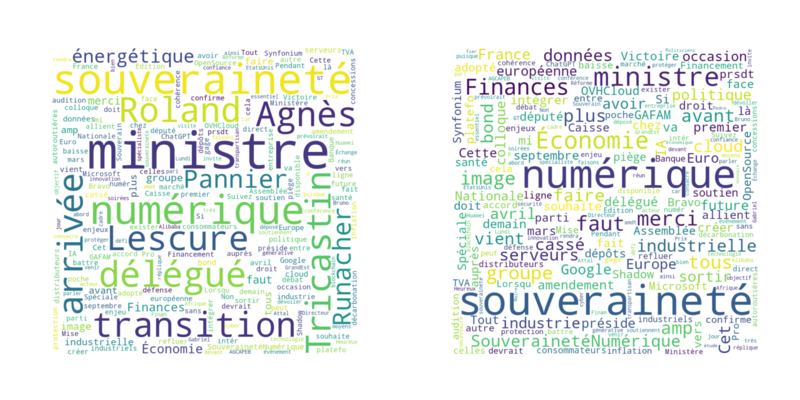

Fig 1 : nuage de mots clé avant nettoyage (image de gauche)                                                                                                                                                                                                                                                                                                                                                                                  Fig 2 : nuage de mots clé après nettoyage (image de droite)


In [2]:
from IPython.display import Image, display
from PIL import Image as pil_image

# Chargement des images et des légendes
image1 = pil_image.open('/Users/Utilisateur/Documents/Python Scripts/data/wordcloud_notclean.png')
image2 = pil_image.open('/Users/Utilisateur/Documents/Python Scripts/data/wordcloud_clean_2.png')
legend1 = 'Fig 1 : nuage de mots clé avant nettoyage (image de gauche)'
legend2 = 'Fig 2 : nuage de mots clé après nettoyage (image de droite)'

# Concaténation des images
images_concat = pil_image.new('RGB', (image1.width + image2.width, max(image1.height, image2.height)))
images_concat.paste(image1, (0, 0))
images_concat.paste(image2, (image1.width, 0))

# Affichage de l'image concaténée avec les légendes
display(images_concat)
print(legend1 + ' '*int(images_concat.width/2 - len(legend1)/2) + legend2)

<u>2.3 Génération et visualition du graphe</u>

Les données structurées vont pouvoir être instancées sous forme de graphe non orienté, pour ce faire la bibliothèque 'Networkx' va créer un objet graphe et la bibliothèque 'Matplotlib' va permettre de visualiser le graphe afin représenter les réseaux en formalisant les relations (basées sur les retweets) entre les entités.<br>
Les deux éléments principaux du graphe sont les noeuds (ou sommets) ici représentés par les utilisateurs ("t_user" et "rt_user") et les arêtes sont représentés par les interactions entre ces utilisateurs càd les retweets.<br>
L'analyse se porte ensuite sur les caractéristiques du graphe (ordre, taille, degré, connectivité).<br>

&gt; Résultat du graphe non orienté : <br>
<ul><li>Nombre noeuds: 1 219 et Nombre d'arêtes: 1 252</li>
<li>Degré maximum: ('tariqkrim': 166 liens)</li>
<li>Degré minimum: ('Cyrille A. NOEL', 1 lien)</li>
<li>Le graphe n'est pas connexe: on ne peut relier tous les nœuds 2 à 2 dans le réseau par au moins une chaine</li>
<li>Il existe 85 sous graphes connectés dans le graphe.</li></ul>

Le graphe n'étant pas connexe, propriété indispensable au calcul des indicateurs de centralité determinants à la défintion et à la contruction graphique du réseau, il faut identifier le plus large sous graphe connexe, càd le sous graph comportant le nombre le plus élevé de connexions et vérifier sa bonne connectivité.<br> 

&gt; Résultat du sous graphe : La plus grand des sous-graphes contient 909 noeuds et 1 025 arêtes et ce sous-graphe est connecté.

&rarr; Import des bibliothèques: networkx et matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

&rarr; Initialisation d'un graphe non orienté vide via la fonction <code>add_edges_from()</code>

In [ ]:
G = nx.Graph()

&rarr; Ajout des arêtes (liens entre les noeuds) via la fonction <code>add_edges_from()</code> et regroupement des noeuds itérables (noms des colonnes: "t_user" et "rt_user" du DataFrame "reseau_df_concat") via la fonction <code>zip()</code> et leurs attributs et renvoyant un objet itérable de tuples.<br>
La fonction <code>add_nodes_from()</code> n'a pas besoin d'être spécifiée car elle est appelée implicitement lors de l'ajout des arêtes.

In [ ]:
G.add_edges_from(zip(reseau_df_concat['t_user'], reseau_df_concat['rt_user']))

&rarr; Positionnement algorithmique des nœuds du graphe via la fonction <code>random_layout()</code> de manière uniforme et au hasard

In [ ]:
pos = nx.random_layout(G)

&rarr; Tracé et visualisation graphique du graphe brute via les fonctions <code>draw()</code> et <code>show()</code>

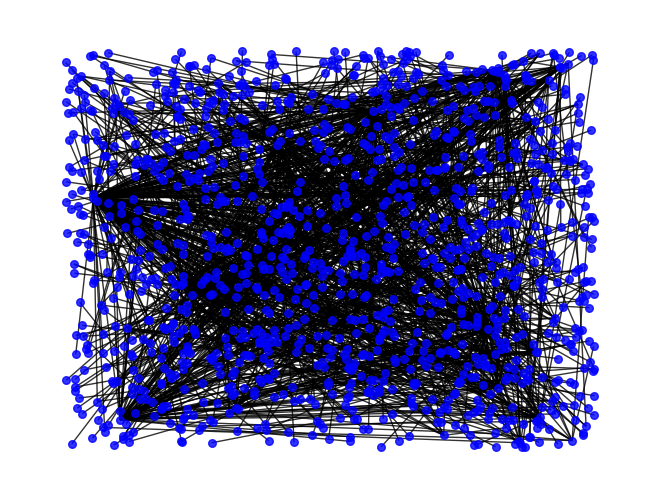

In [3]:
nx.draw(G, pos=pos, node_size=30, node_color='blue', alpha=0.8)
plt.show()

&rarr; Affichage de l'ordre du réseau: nombre de noeuds & Taille du réseau: nombre d'arêtes via les fonctions <code>number_of_nodes()</code> et <code>number_of_edges()</code>

In [4]:
print(f"Il y a {G.number_of_nodes()} noeuds et {G.number_of_edges()} arêtes presents dans le graphe")

Il y a 1219 noeuds et 1252 arêtes presents dans le graphe


&rarr; Calcul et affichage le  degré maximal et minimal de chaque noeud via les fonctions <code>degree()</code>, <code>max()</code> et <code>min()</code> : le degré d’un sommet est le nombre de sommets auquel il est relié.

In [5]:
deg = nx.degree(G)
max_deg = max(deg, key=lambda x: x[1])
min_deg = min(deg, key=lambda x: x[1])
print("Degré maximum:", max_deg)
print("Degré minimum:", min_deg)

Degré maximum: ('tariqkrim', 166)
Degré minimum: ('Cyrille A. NOEL', 1)


&rarr; Vérification de la connexion du graphe via la fonction <code>is_connected()</code> càd si chaque point d’un graphe est atteignable depuis n’importe quel point alors le graphe est connecté ou connexe

In [6]:
if nx.is_connected(G):
    print("Le graphe est connecté")
else:
    print("Le graphe n'est pas connecté")

Le graphe n'est pas connecté


&rarr; Comptabilisation de tous les sous-graphes connectés dans le graphe non connexe via la fonction <code>number_connected_components()</code>

In [7]:
print("Il existe", nx.number_connected_components(G),"de sous-graphes connectés dans le graph")

Il existe 85 de sous-graphes connectés dans le graph


&rarr; Création du sous graphe comportant le plus de connexions via la fonction <code>subgraph()</code>

In [8]:
subgraph = max(nx.connected_components(G), key=len)
G_subgraph = G.subgraph(subgraph)
print("La plus grand sous-graphe contient", G_subgraph.number_of_nodes(), "de noeuds et", G_subgraph.number_of_edges(), "d'arêtes.")

La plus grand sous-graphe contient 909 de noeuds et 1025 d'arêtes.


&rarr; Le sous graphe est-il connexe ? 

In [9]:
if nx.is_connected(G_subgraph):
    print("Le sous-graphe est connecté")
else:
    print("Le sous-graphe n'est pas connecté")

Le sous-graphe est connecté


&rarr; Positionnement des nœuds du sous graphe via la fonction <code>random_layout()</code> algorithme simulant une représentation

In [ ]:
pos = nx.random_layout(G_subgraph)

&rarr; Tracé et visualisation graphique du sous graphe brute via les fonctions <code>draw()</code> et <code>show()</code>

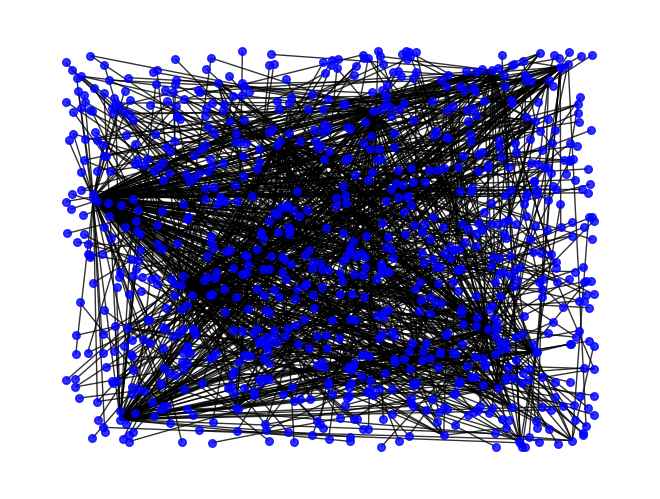

In [10]:
nx.draw(G_subgraph, pos=pos, node_size=30, node_color='blue', alpha=0.8)
plt.show()

<u>2.4 Définition du réseau</u>

Cette partie va définir le réseau final en trouvant et en ordonnant les nœuds du sous graphe en fonction de leur importance à partir des indicateurs de centralités, des mesures caractérisant l’importance des nœuds (et les arêtes) :
<ul><li>La centralité de degré, permet d'ordonner les nœuds en fonction de leur degré, c’est-à-dire du nombre d’autres nœuds qui leur sont liés.</li>
<li>La centralité de proximité indique si le sommet est situé à proximité de l’ensemble des sommets du graphe et s’il peut rapidement interagir avec ces sommets.</li>
<li>La centralité d’intermédiarité est un des concepts les plus importants, il mesure l’utilité du sommet dans la transmission de l’information au sein du réseau, le sommet joue un rôle central si beaucoup de plus courts chemins entre deux sommets doivent emprunter ce sommet.</li></ul>

&rarr; Calcul des 3 indicateurs de centralité dans le sous graphe via les fonctions <code>degree_centrality()</code>, <code>closenness_centrality()</code> et <code>betwenness_centrality()</code>

In [ ]:
degree_c = nx.degree_centrality(G_subgraph)
degree_close_c = nx.closeness_centrality(G_subgraph)
degree_between_c = nx.betweenness_centrality(G_subgraph, normalized=False)

&rarr; Affichage des 10 premiers noeuds centraux pour chaque indicateur de centralité dans le sous graphe

In [11]:
degree_c = nx.degree_centrality(G_subgraph)
degree_close_c = nx.closeness_centrality(G_subgraph)
degree_between_c = nx.betweenness_centrality(G_subgraph, normalized=False)
print("Centralité de degré, top 10:")
print(sorted(degree_c.items(), key=lambda x: x[1], reverse=True)[:10])
print("Centralité de proximité, top 10:")
print(sorted(degree_close_c.items(), key=lambda x: x[1], reverse=True)[:10])
print("Centralité d'intermédiarité, top 10:")
print(sorted(degree_between_c.items(), key=lambda x: x[1], reverse=True)[:10])

Centralité de degré, top 10:
[('tariqkrim', 0.1828193832599119), ('LopezLiguori', 0.08370044052863437), ('SouveraineTech', 0.07709251101321586), ('BFMTV', 0.07709251101321586), ('gchampeau', 0.07599118942731278), ('bortzmeyer', 0.05176211453744494), ('SylvRolland', 0.0407488986784141), ('framaka', 0.027533039647577095), ('MajoriteGE', 0.026431718061674013), ('AssembleeNat', 0.024229074889867842)]
Centralité de proximité, top 10:
[('Souveraine Tech', 0.294996751137102), ('tariqkrim', 0.2727545809552418), ('gchampeau', 0.2643377001455604), ('SouveraineTech', 0.2626554816314724), ('LopezLiguori', 0.26204906204906203), ('linagora', 0.2611446649410411), ('Ivan Diego Meseguer', 0.25222222222222224), ('framaka', 0.2470748299319728), ('Sébastien BRICE', 0.24461206896551724), ('iDFRights', 0.2431057563587684)]
Centralité d'intermédiarité, top 10:
[('tariqkrim', 149015.02433652926), ('Souveraine Tech', 137086.80016583015), ('LopezLiguori', 93588.87690372128), ('gchampeau', 88655.8787309741), ('l

<u>2.5 Construction du réseau</u>

&gt; Les dix noeuds ayant obtenus les meilleurs coefficients de centralité:
<ul><li>Centralité de degré:</li>
    <ul><li>tariqkrim: 0.18</li>
        <li>LopezLiguori: 0.08</li>
        <li>SouveraineTech: 0.08</li>
        <li>BFMTV: 0.08</li>
        <li>gchampeau: 0.08</li>
        <li>bortzmeyer: 0.05</li>
        <li>SylvRolland: 0.04</li>
        <li>framaka: 0.03</li>
        <li>MajoriteGE: 0.03</li>
        <li>AssembleeNat: 0.02</li></ul></ul>
<ul><li>Centralité de proximité:</li>
        <ul><li>Souveraine Tech: 0.29</li>
        <li>tariqkrim: 0.27</li>
        <li>gchampeau: 0.26</li>
        <li>SouveraineTech: 0.26</li>
        <li>LopezLiguori: 0.26</li>
        <li>linagora: 0.26</li>
        <li>Ivan Diego Meseguer: 0.25</li>
        <li>framaka: 0.25</li>
        <li>Sébastien BRICE: 0.24</li>
        <li>iDFRights: 0.24</li></ul></ul></ul>
<ul><li>Centralité d'intermédiarité:</li>
        <ul><li>tariqkrim: 149015.02</li>
        <li>Souveraine Tech: 137086.8</li>
        <li>LopezLiguori: 93588.88</li>
        <li>gchampeau: 88655.88</li>
        <li>linagora: 77633.22</li>
        <li>SouveraineTech: 72767.33</li>
        <li>BFMTV: 68312.19</li>
        <li>platombe: 65347.61</li>
        <li>La veille techno: 60152.91</li>
        <li>Menuet Morgan: 41570.51</li></ul></ul>  
        
&gt; Résultat de l'analyse du graphe:<br> 
Les noeuds centraux vont être basés à partir des utilisateurs ayant le plus haut score de centralité tous indicateurs confondus à savoir "tariqkrim" et "Souveraine Tech" permettant ainsi la construction graphique du réseau, où chaque noeud (utilisateur) est pondéré (via la taille et la couleur) en fonction de son degré.<br> 
On constate que la plupart des noeuds adjacents aux deux noeuds centraux à savoir 'tariqkrim' (colorisé en orange) et 'Souveraine Tech' (colorisé en rouge) ont un faible indice de degré de centralité intermédiare. 

&rarr; Calcul des degrés des noeuds du sous-graphe

In [ ]:
node_and_degree = G_subgraph.degree()
central_nodes = ['tariqkrim', 'Souveraine Tech']

&rarr; Organisation des nœuds via la fonction <code>spring_layout()</code> permettant de positionner les nœuds à l'aide de l'algorithme dirigé par la force de Fruchterman-Reingold.

In [ ]:
pos = nx.spring_layout(G_subgraph, k=0.05)

&rarr; Couleurs des nœuds centraux et calcul des centralités d'intermédiarité de tous noeuds du sous-graphe

In [ ]:
node_colors = list(node_and_degree.values())
colors_central_nodes = ['orange', 'red']

betweenness_dict = nx.betweenness_centrality(G_subgraph)
betweenness = [betweenness_dict[n] for n in G_subgraph.nodes()]

&rarr; Génération graphique et paramétrage du réseau via les fonctions <code>figure()</code>, <code>nx.draw_networkx_edges()</code>, <code>draw_networkx_nodes()</code>, les nœuds sont de tailles et couleurs différentes selon leur degré de centralité

In [ ]:
plt.figure(figsize=(20, 20))
nodes = nx.draw_networkx_nodes(G_subgraph, pos, node_size=60, node_color=betweenness, cmap=plt.cm.PiYG, alpha=0.6)
edges = nx.draw_networkx_edges(G_subgraph, pos, edge_color='black', alpha=0.5, width=0.1)
nodes.set_norm(plt.Normalize(vmin=0, vmax=max(betweenness)))
plt.colorbar(nodes)

&rarr; Affichage du graphique du réseau final via les fonctions <code>savefig()</code> et <code>show()</code>

In [ ]:
nx.draw_networkx_nodes(G_subgraph, pos=pos, nodelist=central_nodes, node_size=300, node_color=colors_central_nodes)
plt.axis('off')
plt.show()

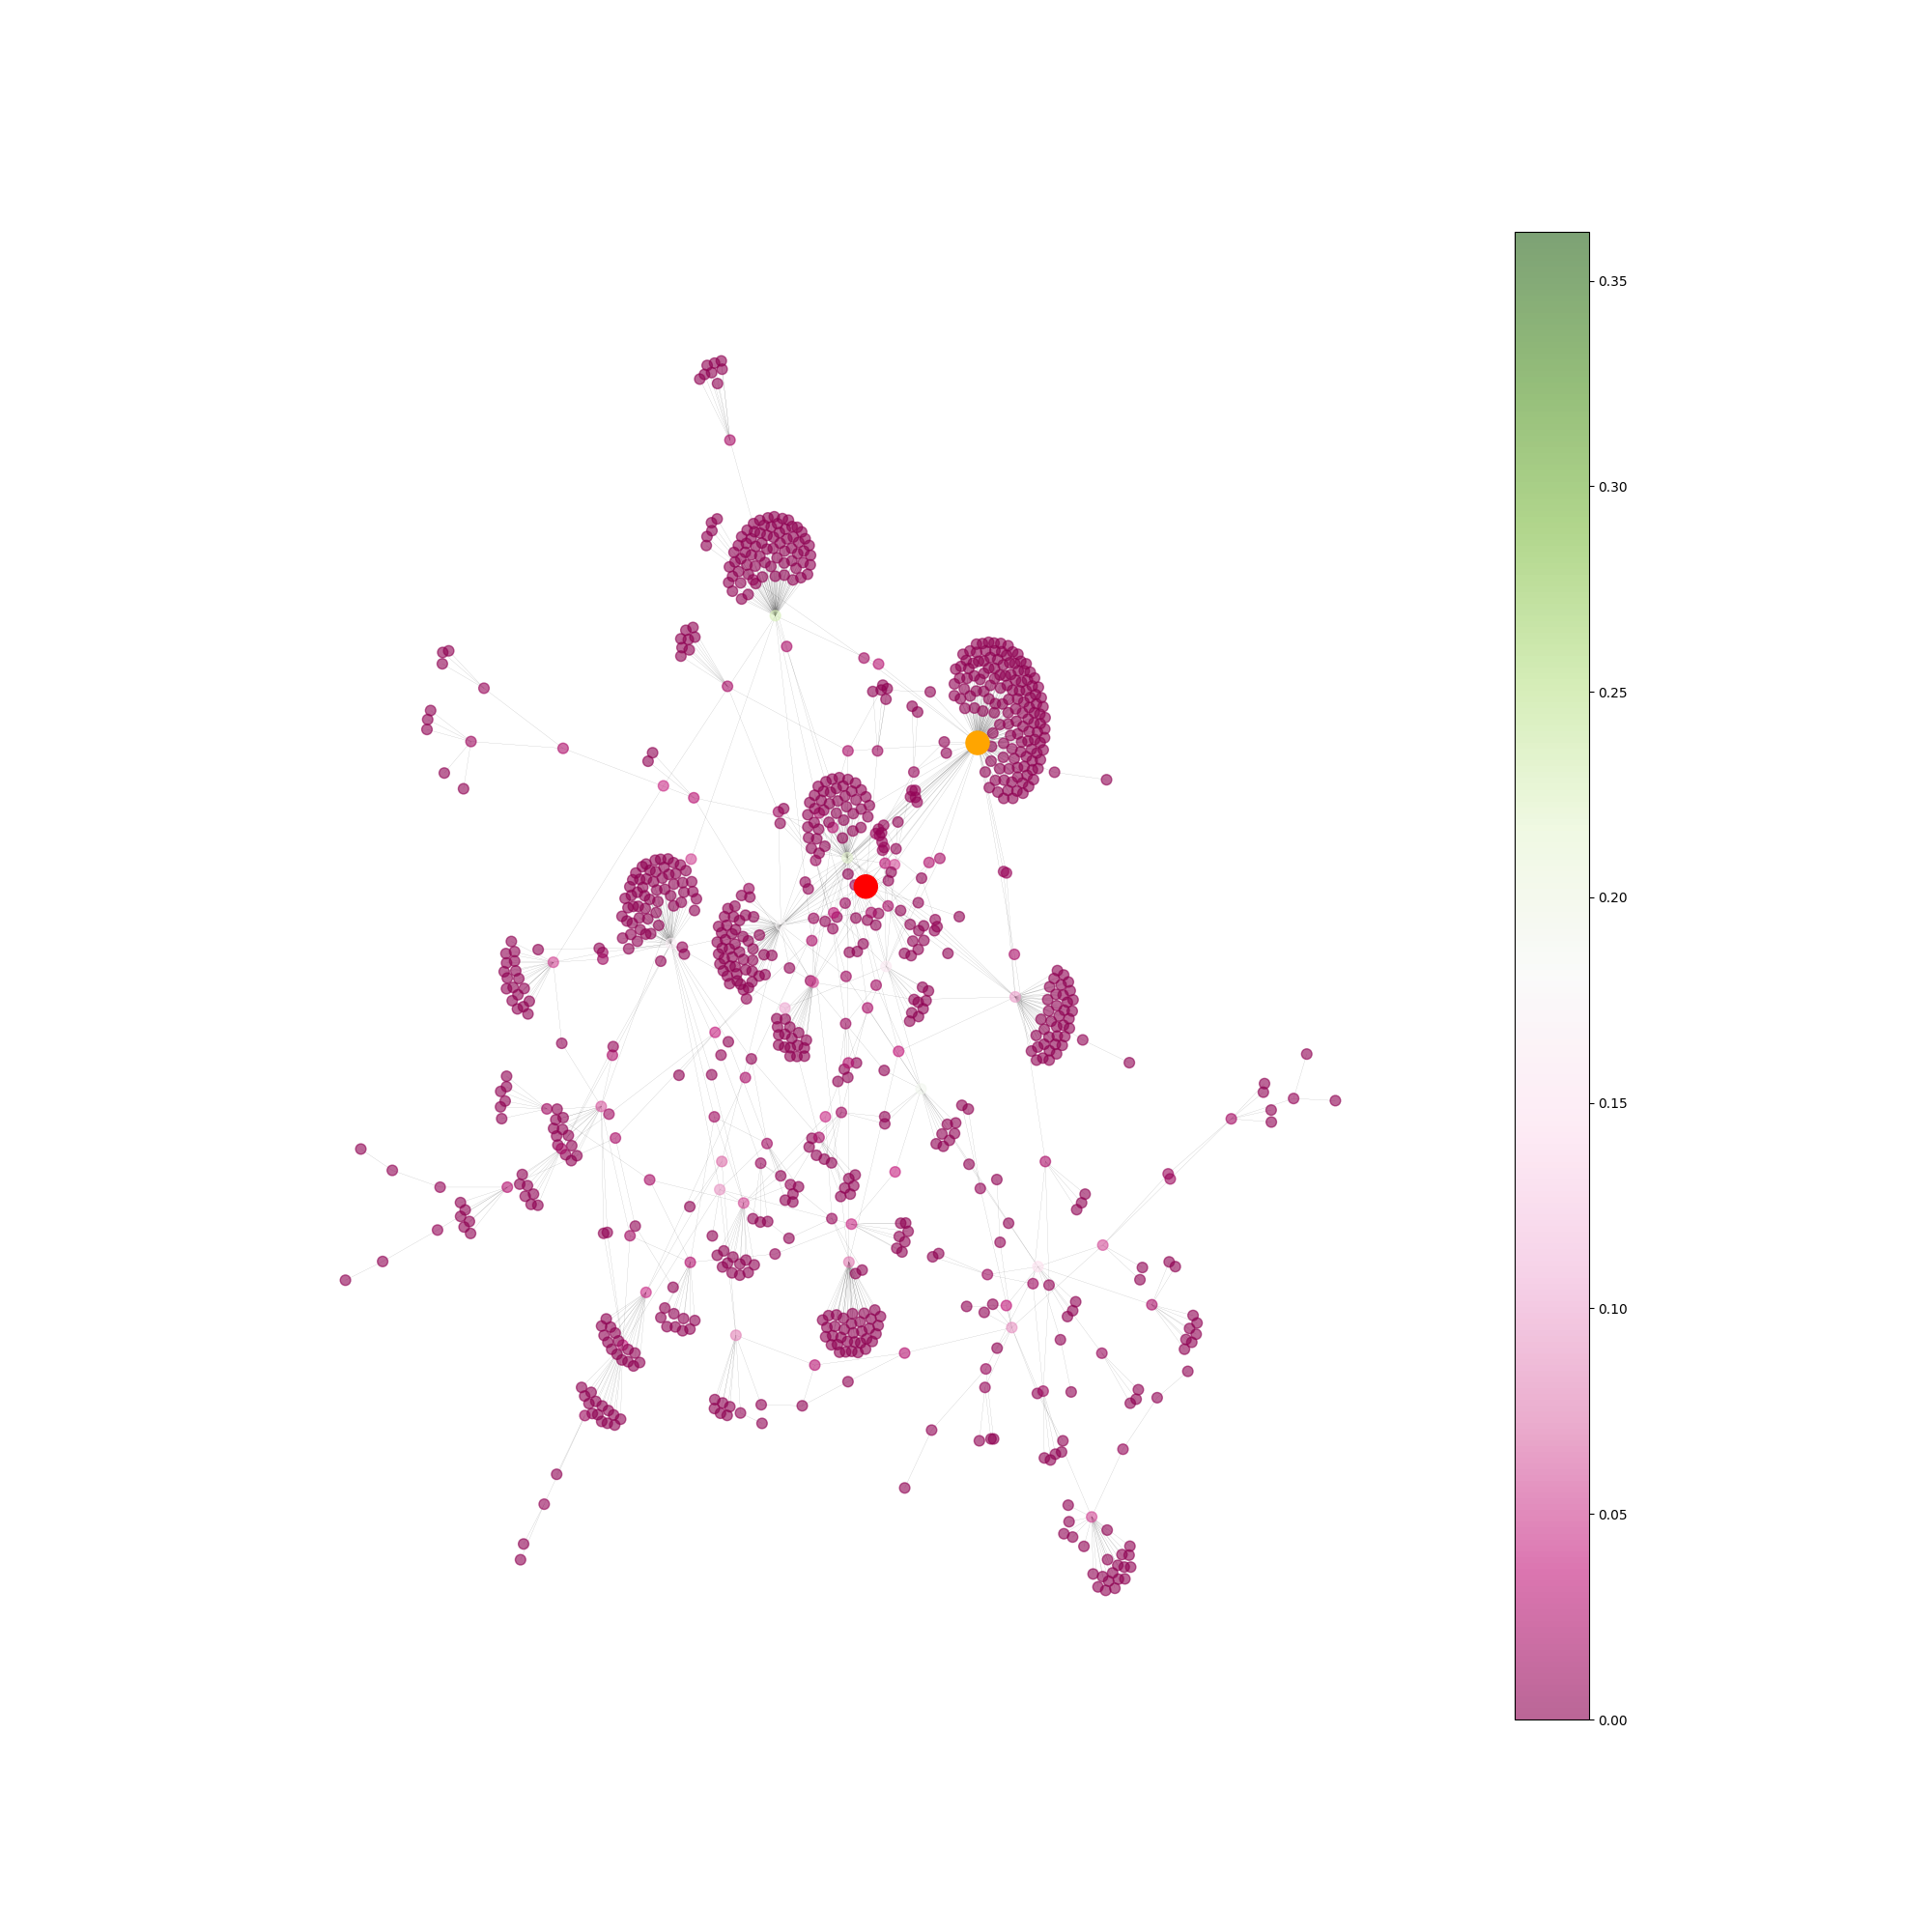

In [1]:
from IPython import display
display.Image('/Users/Utilisateur/Documents/Python Scripts/data/graphfinal.png')

<u>3. Interprétation du réseau et conclusion </u>

L'étude met en évidence, sur la période d'observation, la fragmentation des acteurs sur la thématique de la souveraineté numérique et l'émergence de deux leaders centraux en tête sur la question en France est clairement portée par la sphère privé: Tariq Karim, entrepreneur français et le site souveraine.tech un petit site indépendant français.<br>

Il convient de souligner que l'étude présente des limites, tant sur le plan technique que méthodologique.<br>
L'accès restreint aux archives des publications de tweets contraint à travailler sur une source de données peu volumineuse.<br>
Egalement à mettre en relation avec la formulation de l'étude basée sur un terme de recherche rendant davantage problématique l'interprétation, une couverture élargie aurait été plus contributive à l'analyse, la souveraineté numérique ne constitue pas un seul concept théorique, la thématique couvre de nombreux domaines: "autonomie" économie et industriel, cybersécurité, vie privé, etc...
On peut également se demander si qu'une méthodologie basée sur une analyse des sentiments, aurait été plus approriée pour un sujet aussi polarisant concernant aussi bien l'état que ses citoyens.

Pour conclure, même si la méthode mobilisée peut sembler innovante, l'interprétabilité des résultats de l'étude est partiellement biaisée, certainement que d'autres leaders d'opinion pouvant exercer une réelle influence auraient pu être sous-représentés dans le réseau, il peut paraitre surprenant que le débat de la souveraineté numérique, au centre des enjeux de croissance économique, ne soit pas porté par un acteur à forte notoriété de la sphère publique (cf. compte institutionnel ou personnalité politique) sur le média social.<br>



<u>Annexe</u>

Ce document a été rédigé et généré à partir de Jupyter Notebook

&rarr; Bibliothèques mobilisées

In [ ]:
# Collecte et structuration des données
import tweepy
import datetime
import csv
import pandas as pd
import glob
import pandas as pd
# Nettoyage des données
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
# Construction du réseau
import networkx as nx
import matplotlib.pyplot as plt

&rarr; Méthodologie

<ul><li>https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5</li>
<li>https://www.jonathanconrow.com/new-blog/2018/5/1/network-analysis-of-two-2018-trending-memes-yodelingwalmartkid-and-girther</li>
<li>Wordcloud et NLP: https://pythonds.linogaliana.fr/nlpintro/</li>
<li>Indicateurs de centralité : https://cedric.cnam.fr/vertigo/Cours/RCP216/tpCheminsCentralites.html</li>
<li>Tracé graphique: https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html#sphx-glr-auto-examples-algorithms-plot-betweenness-centrality-py</li></ul>

&rarr; Références

<ul><li>(1) https://www.mediametrie.fr/sites/default/files/2019-02/2019%2003%2001%20CP%20Audience%20Internet%20Global_Janvier.pdf</li>
<li>(2) https://lejournal.cnrs.fr/nos-blogs/de-la-decouverte-a-linnovation/que-vaut-vraiment-le-poids-politique-sur-twitter</li></ul>


&rarr; Données

Dataset  
<ul><li>tweets :<ul><li>dataset_T_03-23-2023.csv</li><li>dataset_T_03-30-2023</li><li>dataset_T_04-05-2023</li><li>dataset_T_04-16-2023</li><li>dataset_T_04-21-2023</li><li>dataset_T_final</li></ul></ul>
<ul><li>retweets:
<ul><li>dataset_RT_03-23-2023.csv</li><li>dataset_RT_03-30-2023</li><li>dataset_RT_04-05-2023</li><li>dataset_RT_04-16-2023</li><li>dataset_RT_04-21-2023</li><li>dataset_RT_final</li></ul></ul>
    
Code source <ul><li>collect_tweets.py</li><li>wordcloud_text_tweets.py</li><li>graph_network.py</li></ul></ul>